In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (auc, 
                             roc_auc_score, 
                             precision_recall_curve, 
                             confusion_matrix, 
                             accuracy_score, 
                             recall_score, log_loss, f1_score, roc_curve, classification_report)
from sklearn.model_selection import (train_test_split, 
                                     KFold, 
                                     GridSearchCV, cross_val_score)
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


In [3]:
df = pd.read_csv('./bioresponse_csv.csv')
df.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
df['target'].value_counts()

1    2034
0    1717
Name: target, dtype: int64

In [5]:
df.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,0.270411,...,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197,0.542255
std,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,0.096128,...,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236,0.498278
min,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,0.003040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,0.194357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,0.284316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,0.344626,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, D1 to target
dtypes: float64(1776), int64(1)
memory usage: 50.9 MB


In [7]:
df.isnull().value_counts()

D1     D2     D3     D4     D5     D6     D7     D8     D9     D10    D11    D12    D13    D14    D15    D16    D17    D18    D19    D20    D21    D22    D23    D24    D25    D26    D27    D28    D29    D30    D31    D32    D33    D34    D35    D36    D37    D38    D39    D40    D41    D42    D43    D44    D45    D46    D47    D48    D49    D50    D51    D52    D53    D54    D55    D56    D57    D58    D59    D60    D61    D62    D63    D64    D65    D66    D67    D68    D69    D70    D71    D72    D73    D74    D75    D76    D77    D78    D79    D80    D81    D82    D83    D84    D85    D86    D87    D88    D89    D90    D91    D92    D93    D94    D95    D96    D97    D98    D99    D100   D101   D102   D103   D104   D105   D106   D107   D108   D109   D110   D111   D112   D113   D114   D115   D116   D117   D118   D119   D120   D121   D122   D123   D124   D125   D126   D127   D128   D129   D130   D131   D132   D133   D134   D135   D136   D137   D138   D139   D140   D141   D142   D143  

In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((3000, 1776), (751, 1776))

In [11]:
num_folds = 10
scoring = 'accuracy'

In [12]:
results, names = [], []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.787333 (0.023561)
CART: 0.708000 (0.028952)


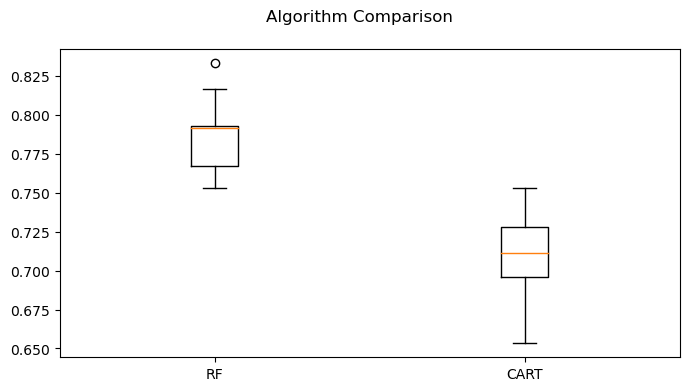

In [13]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

In [14]:
rf_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

In [15]:
kfold = KFold(n_splits=num_folds, random_state=7, shuffle=True)
rf_grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_param_grid, scoring=scoring, cv=kfold)
rf_grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (rf_grid_search.best_score_, rf_grid_search.best_params_))

Best: 0.764000 using {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 100}


In [16]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=9, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=9)

In [18]:
predictions = rf_model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))

0.7416777629826897
0.7719298245614035
0.7604938271604937


In [19]:
confusion_matrix(y_test, predictions)

array([[249, 103],
       [ 91, 308]])

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       352
           1       0.75      0.77      0.76       399

    accuracy                           0.74       751
   macro avg       0.74      0.74      0.74       751
weighted avg       0.74      0.74      0.74       751



[0.00450709 0.00672106 0.00485189 ... 0.         0.         0.        ]


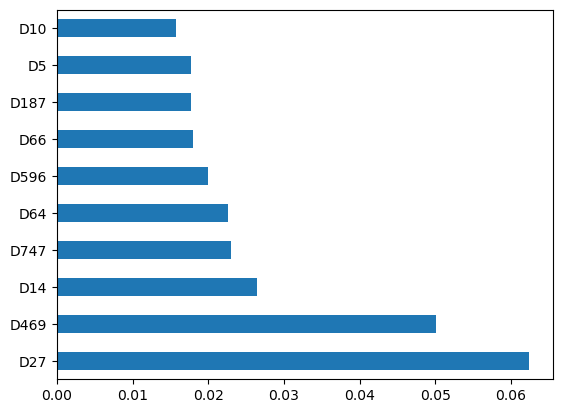

In [22]:
print(rf_model.feature_importances_)
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.show()

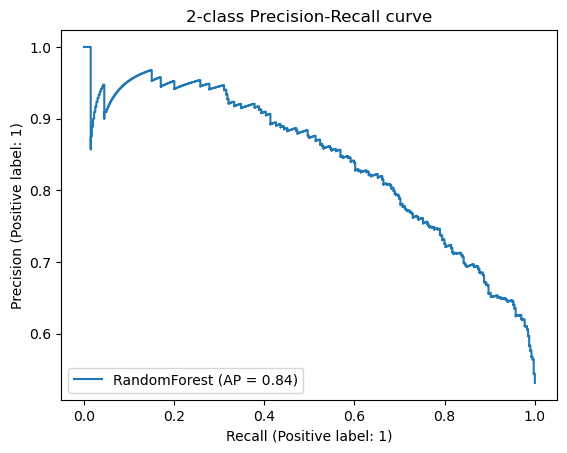

In [23]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf_model, X_test, y_test, name="RandomForest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

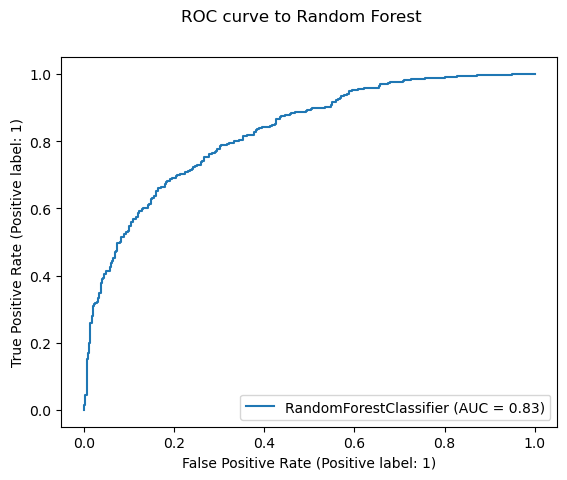

In [24]:
from sklearn.metrics import RocCurveDisplay

rf_disp = RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
rf_disp.figure_.suptitle("ROC curve to Random Forest")
plt.show()

## Work with Decision Tree

In [30]:
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

In [31]:
kfold = KFold(n_splits=num_folds, random_state=7, shuffle=True)
dt_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dt_param_grid, scoring=scoring, cv=kfold)
dt_grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (dt_grid_search.best_score_, dt_grid_search.best_params_))

Best: 0.755000 using {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 6, 'splitter': 'best'}


In [32]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=None, max_leaf_nodes=6, splitter='best')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)

In [33]:
predictions = dt_model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))

0.7683089214380826
0.8170426065162907
0.7893462469733655


In [34]:
confusion_matrix(y_test, predictions)

array([[251, 101],
       [ 73, 326]])

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       352
           1       0.76      0.82      0.79       399

    accuracy                           0.77       751
   macro avg       0.77      0.77      0.77       751
weighted avg       0.77      0.77      0.77       751



[0. 0. 0. ... 0. 0. 0.]


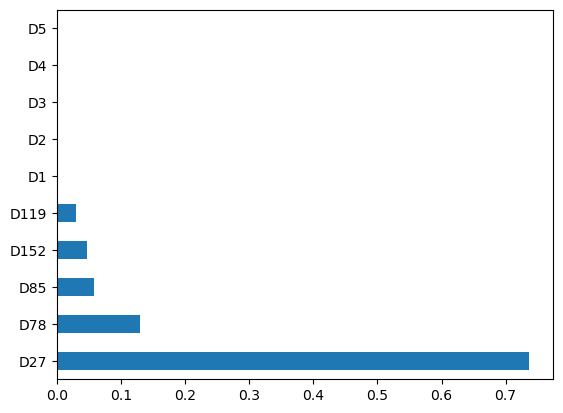

In [36]:
print(dt_model.feature_importances_)
dt_feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)

dt_feat_importances.nlargest(10).plot(kind='barh')
plt.show()

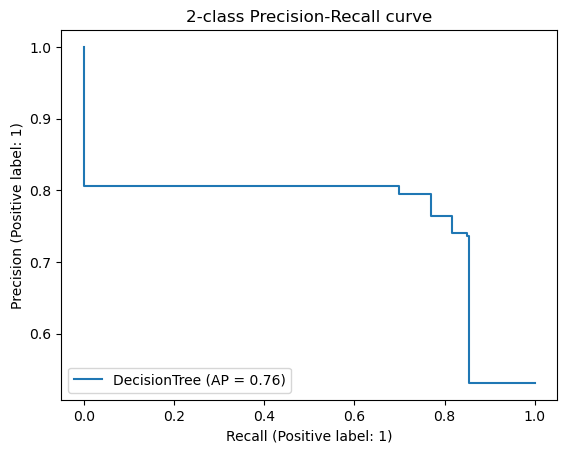

In [37]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    dt_model, X_test, y_test, name="DecisionTree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

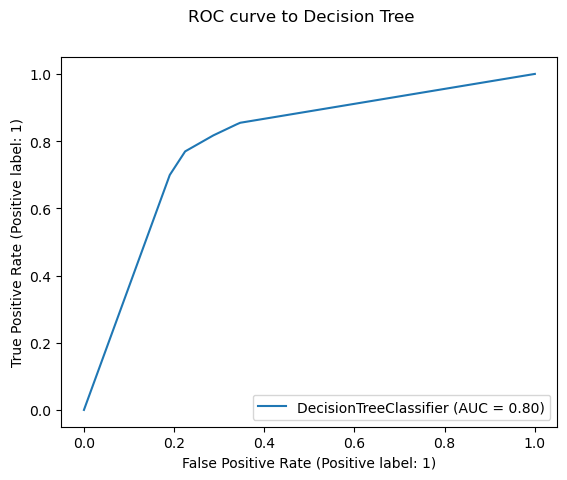

In [38]:
from sklearn.metrics import RocCurveDisplay

dt_disp = RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
dt_disp.figure_.suptitle("ROC curve to Decision Tree")
plt.show()